In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline 

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей.

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии.  
Ссылка на шаблон к презентации: лежит рядом с заданием в классруме.  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода или злоупотреблять скринами блокнота не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы. 

### Вопросы, на которые нужно ответить в презентации: 
- Сколько рейтинговых групп представлено в данных?
- Какие оценки пользователи ставят чаще всего?
- Какие оценки пользователи ставят в среднем?
- В какие годы были запущены шоу?
- Можно ли сделать вывод, что 2017 год успешнее для Netflix?
- В каких рейтинговых группах запущены шоу на Netflix?
- Выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший Data Scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

### Полезные замечания и советы
- Следите за тем, чтобы все графики на слайдах можно было прочитать даже без ваших комментариев;
- Не нужно делать просто текстовые слайды;
- Не обязательно ограничиваться представленным датасетом. У вас есть весь интернет, чтобы найти дополнительную информацию и проверить ваши гипотезы. Дерзайте!


## Решение

Скачайте данные: они лежат рядом с этим файлом в классруме. 
Загрузите данные, выполнив код ниже.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NetflixShows.csv to NetflixShows.csv


In [ ]:
# Важно
# ==>
# Изменил encoding с 'cp437' на 'latin-1'
# так как при 'cp437' в столбце 'title' в наименованиях шоу встречались символы UNICODE

data = pd.read_csv("NetflixShows.csv", encoding='latin-1')
del data['ratingDescription']

In [ ]:
# 'user rating score' - оценка пользователей фильма
# 'user rating size' - число пользователей, оценивших данный фильм
data.head()

,title,rating,ratingLevel,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0,80


In [ ]:
data.tail()

,title,rating,ratingLevel,release year,user rating score,user rating size
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN,81
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN,82
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN,82
999,Growing Up Wild,G,NaN,2016,80.0,80


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   release year       1000 non-null   int64  
 4   user rating score  605 non-null    float64
 5   user rating size   1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


### Удалите из данных дубликаты. 
- Почему они возникли?
- Много ли их? В каких группах их больше всего?

In [ ]:
# Сумма дублирующихся строк
data.duplicated().sum()

500

In [ ]:
# Если смотреть дубликаты по названиям шоу, то их 504.
# Почему? Это ремейки на фильмы и они имеют такие же названия.
# В данном случае удалим только абсолютные дубликаты:

data.duplicated(subset=['title']).sum()

504

In [ ]:
duplicates = data[data.duplicated()]
duplicates.shape

(500, 6)

In [ ]:
# Аналогичным образом мы можем посмотреть на неповторяющиеся значения
( ~ data.duplicated()).sum()

500

In [ ]:
# Удаление дубликатов,
# параметр ignore_index создает новый индекс
data.drop_duplicates(ignore_index=True,
                     inplace=True)

data.shape

(500, 6)

In [ ]:
# Проверка наличия дубликатов
data.duplicated().values.any()

False

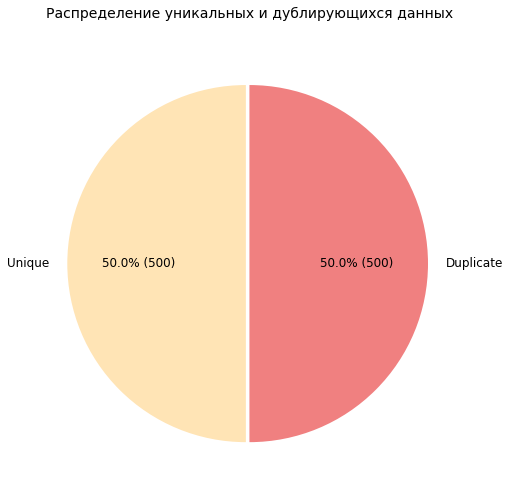

In [ ]:
# Распределение уникальных и дублирующихся данных

# Функция создания аргументов autocpt
def func(pct, allvals):
    absolute = int(pct/100. * np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)


vals_ratio = [len(data), len(duplicates)]
labels_ratio = ['Unique', 'Duplicate']

fig = plt.figure(figsize =(8, 14))
colors = ['#ffe4b5', '#f08080']
plt.title('Распределение уникальных и дублирующихся данных\n',
          fontsize=14,
          loc='center',
          color='k')

plt.pie(vals_ratio,
        labels=labels_ratio,
        colors=colors,
        startangle=90,
        autopct=lambda pct: func(pct, vals_ratio),
        explode=(0.02,0),
        pctdistance=0.6,
        textprops={"fontsize":12})

plt.show()

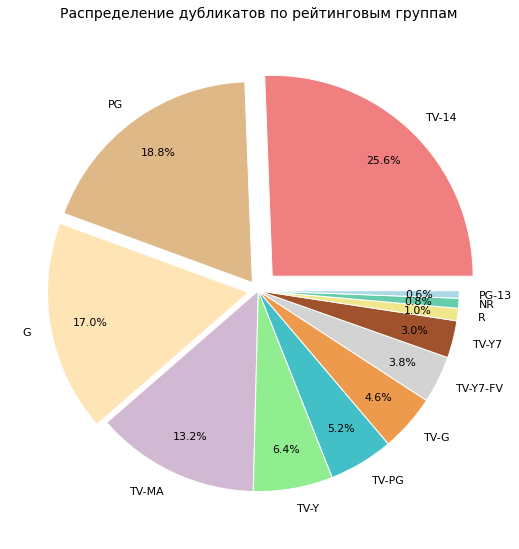

In [ ]:
# Распределение дубликатов по рейтинговым группам

vals_double = duplicates['rating'].value_counts().tolist()
labels_double = duplicates['rating'].value_counts().index.tolist()

fig = plt.figure(figsize =(9, 15))
colors = ['#f08080', '#deb887', '#ffe4b5', '#d2b9d3',
          '#90ee90', '#43bfc7', '#ee9a4d', '#d3d3d3',
          '#a0522d', '#f0e68c', '#66cdaa', '#add8e6']
explode=(0.1, 0.05, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.title('Распределение дубликатов по рейтинговым группам\n',
          fontsize=14,
          loc='center',
          color='k')

plt.pie(vals_double,
        labels=labels_double,
        colors=colors,
        explode=explode,
        startangle=0,
        autopct='%1.1f%%',
        pctdistance=0.8,
        wedgeprops={'edgecolor':'white'},
        textprops = {"fontsize":11})

plt.show()

###Анализ пропущенных значений

In [ ]:
data.isna().sum()

title                  0
rating                 0
ratingLevel           33
release year           0
user rating score    244
user rating size       0
dtype: int64

In [ ]:
# Матрица корреляции пропущенных значений.

# Показывает насколько сильно присутствие или отсутствие значений одного признака влияет на присутствие значений другого.
# Значения корреляции могут быть от −1 (если значения одного признака присутствуют, значения другого — отсутствуют) 
# до 1 (если присутствуют значения одного признака, то присутствуют значения и другого).
# ==>
# В нашем случае можем сделать вывод, что пропущенные значения не имеют выраженной корреляции.

data[['ratingLevel', 'user rating score']].isnull().corr()

,ratingLevel,user rating score
ratingLevel,1.000000,0.111131
user rating score,0.111131,1.000000


In [ ]:
# Относительная частота уникальных значений,
# из этого видно, что по столбцу 'user rating score' 48.8% значений это NaN
data['user rating score'].value_counts(dropna=False, normalize=True).head()

NaN     0.488
98.0    0.024
97.0    0.024
96.0    0.024
95.0    0.022
Name: user rating score, dtype: float64

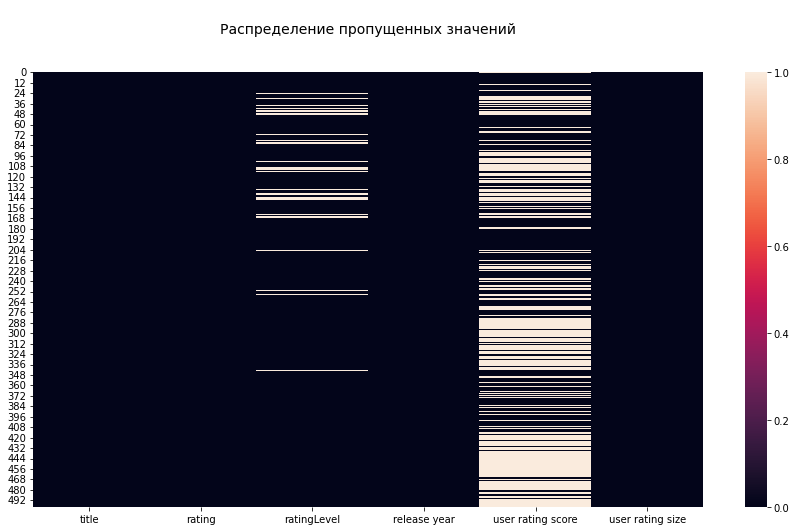

In [ ]:
# Тепловая карта пропусков

plt.figure(figsize=(15,8))
plt.title('\nРаспределение пропущенных значений\n\n',
          fontsize=14,
          loc='center',
          color='k')

sns.heatmap(data.isnull())

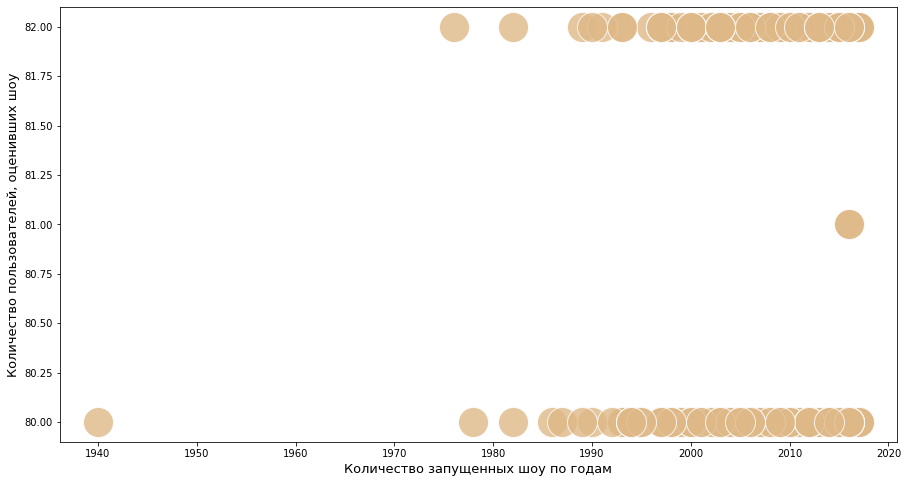

In [ ]:
# Видим, что в 'user rating size' присутствуют 3 группы
# И уже на этом графике видим выброс (обработаем его чуть позже)

plt.figure(figsize=(15, 8))

X = pd.DataFrame(data, columns=['release year'])
y = pd.DataFrame(data, columns=['user rating size'])

plt.xlabel('Количество запущенных шоу по годам',fontsize=13)
plt.ylabel('Количество пользователей, оценивших шоу',fontsize=13)
plt.scatter(X, y, s=900, alpha=0.8, ec='white', color='#deb887')

plt.show()

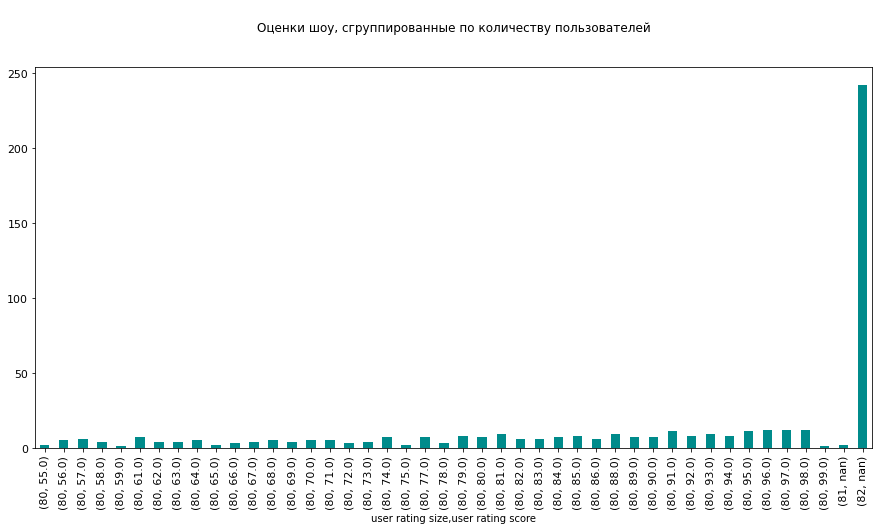

In [ ]:
# Важно
# ==>
# Видим, что у шоу, которые оценили 81 и 82 пользователя, все оценки заполнены NaN,
# при этом у шоу, которые оценили 80 пользователей, оценки заполнены корректно

data.groupby('user rating size')['user rating score'].value_counts(dropna=False)\
                                                     .sort_index(ascending=True)\
                                                     .plot(kind='bar',
                                                           title='\nОценки шоу, сгруппированные по количеству пользователей\n\n',
                                                           fontsize=11,
                                                           figsize=(15,7),
                                                           color='#008b8b')

###Анализ пропущенных значений в столбце 'ratingLevel'

---



In [ ]:
data.groupby('rating')['ratingLevel'].value_counts(dropna=False)

rating    ratingLevel                                                                                                                  
G         General Audiences. Suitable for all ages.                                                                                        52
          NaN                                                                                                                               1
NR        This movie has not been rated.                                                                                                    7
          NaN                                                                                                                               3
PG        Parental guidance suggested. May not be suitable for children.                                                                   12
                                                                                                                                           ..
TV-PG     Na

In [ ]:
# Родители строго предостерегли. Может не подходить для детей в возрасте 14 лет и младше.
# диалог, язык, сексуальные ситуации и насилие
TV_14 = data[data['rating'] == 'TV-14']
TV_14['ratingLevel'].value_counts(dropna=False)

Parents strongly cautioned. May be unsuitable for children ages 14 and under.    100
NaN                                                                                5
dialogue, language, sexual situations and violence                                 1
Name: ratingLevel, dtype: int64

In [ ]:
# Для взрослой аудитории. Может не подходить для детей до 17 лет.
TV_MA = data[data['rating'] == 'TV-MA']
TV_MA['ratingLevel'].value_counts(dropna=False)

For mature audiences.  May not be suitable for children 17 and under.    60
NaN                                                                      22
Name: ratingLevel, dtype: int64

In [ ]:
# Рекомендуется родительское руководство. Может не подходить для детей.
# легкие тематические элементы
# ...
PG = data[data['rating'] == 'PG']
PG['ratingLevel'].value_counts(dropna=False)

Parental guidance suggested. May not be suitable for children.           12
mild thematic elements                                                    3
rude and suggestive humor, and some action                                1
action sequences and peril                                                1
adult content and mld violence                                            1
                                                                         ..
mild suggestive humor                                                     1
sequences of martial arts action                                          1
some scary images, action and rude humor                                  1
scary and intense creature action and images, and for some rude humor     1
some rude humor and sports action                                         1
Name: ratingLevel, Length: 63, dtype: int64

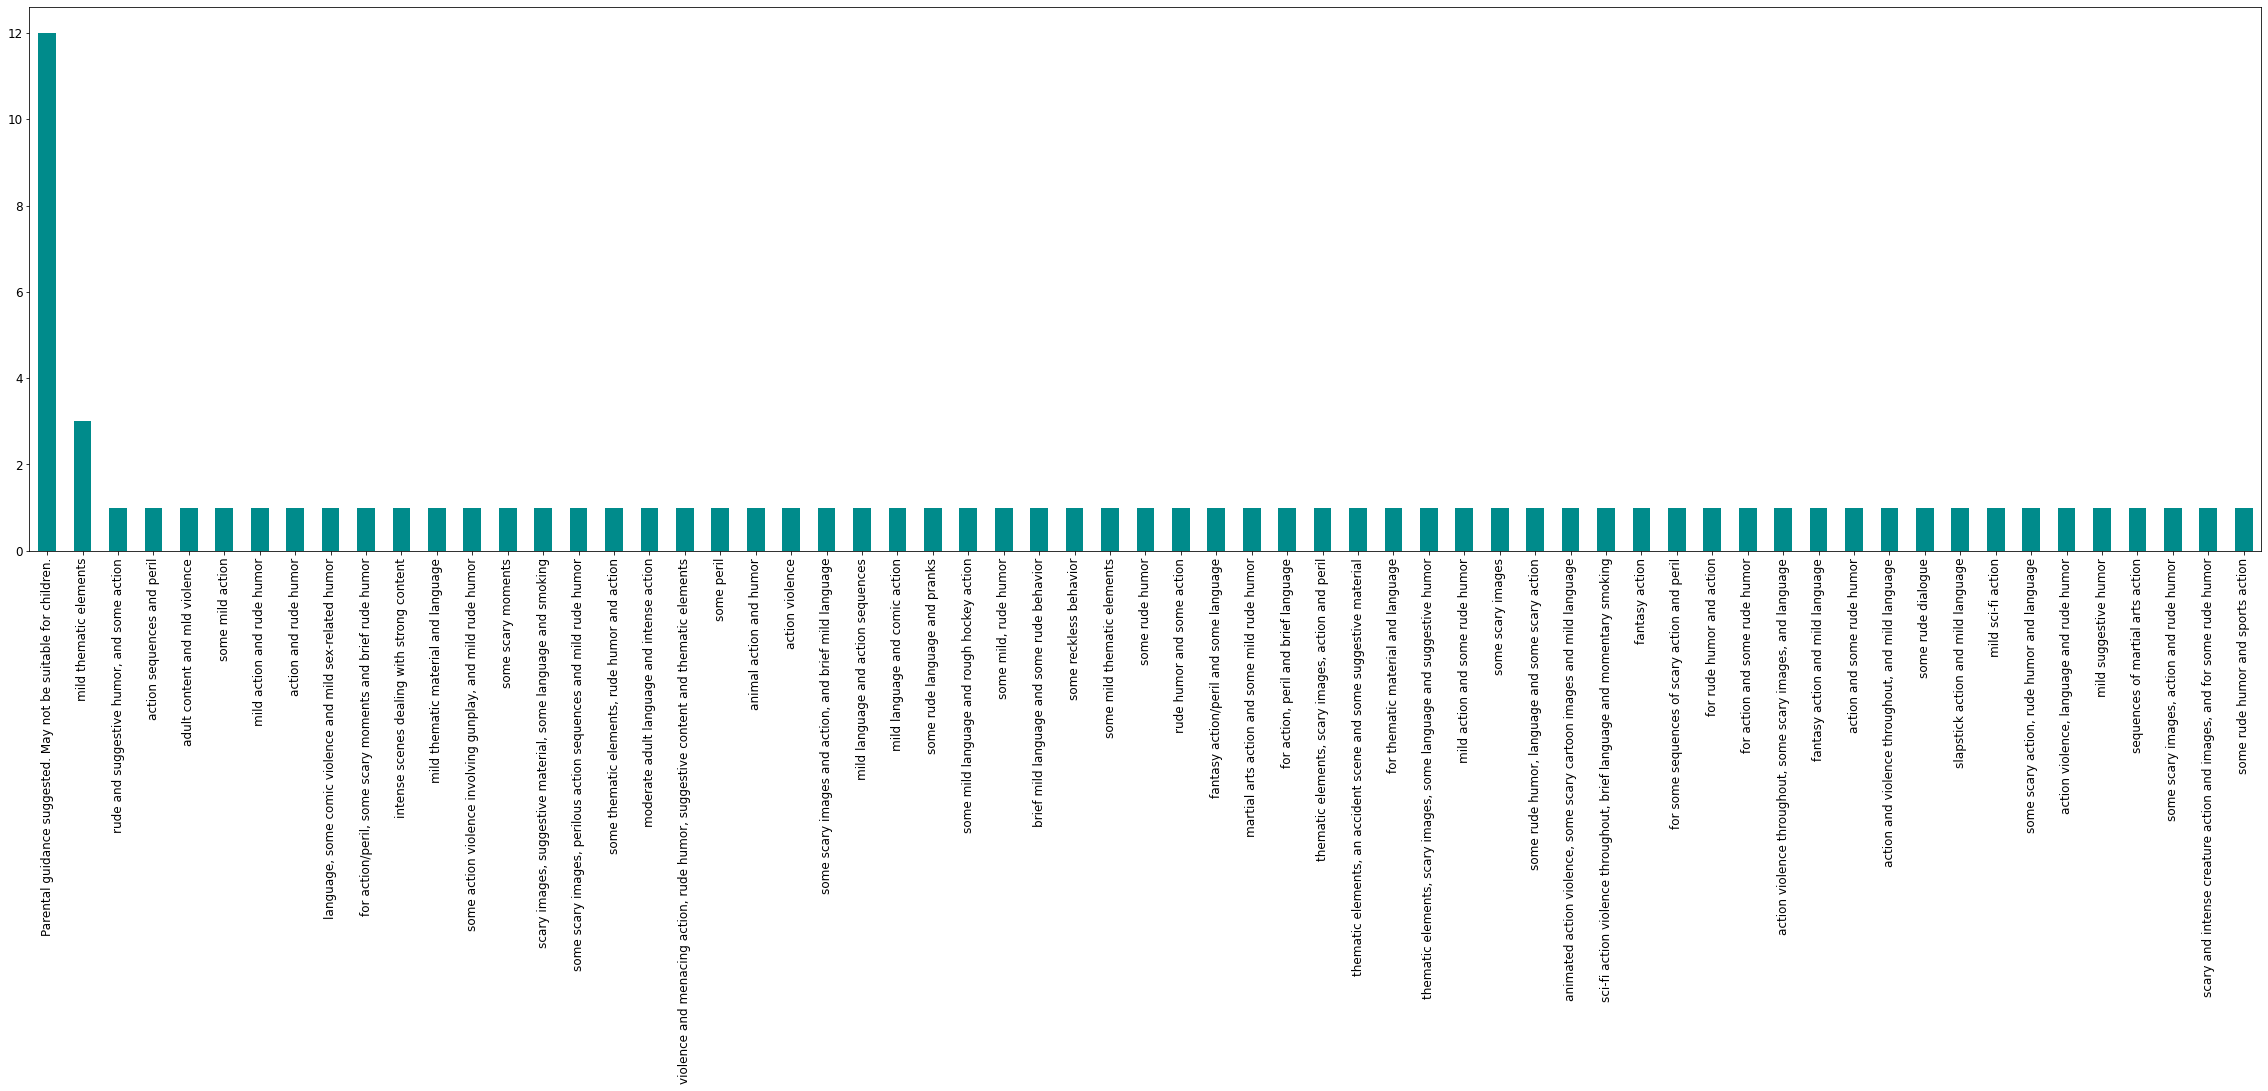

In [ ]:
PG['ratingLevel'].value_counts(dropna=False).plot(kind='bar', figsize=(40,10), fontsize=12, color='#008b8b')

In [ ]:
# Общие аудитории. Подходит для всех возрастов.
G = data[data['rating'] == 'G']
G['ratingLevel'].value_counts(dropna=False)

General Audiences. Suitable for all ages.    52
NaN                                           1
Name: ratingLevel, dtype: int64

In [ ]:
TV_Y = data[data['rating'] == 'TV-Y']
TV_Y['ratingLevel'].value_counts(dropna=False)

Suitable for all ages.    36
Name: ratingLevel, dtype: int64

In [ ]:
TV_PG = data[data['rating'] == 'TV-PG']
TV_PG['ratingLevel'].value_counts(dropna=False)

Parental guidance suggested. May not be suitable for all children.    31
NaN                                                                    2
Name: ratingLevel, dtype: int64

In [ ]:
TV_G = data[data['rating'] == 'TV-G']
TV_G['ratingLevel'].value_counts(dropna=False)

Suitable for all ages.    29
Name: ratingLevel, dtype: int64

In [ ]:
TV_Y7_FV = data[data['rating'] == 'TV-Y7-FV']
TV_Y7_FV['ratingLevel'].value_counts(dropna=False)

Suitable for children ages 7 and older.  Content contains fantasy violence.    25
Name: ratingLevel, dtype: int64

In [ ]:
TV_Y7 = data[data['rating'] == 'TV-Y7']
TV_Y7['ratingLevel'].value_counts(dropna=False)

Suitable for children ages 7 and older    23
Name: ratingLevel, dtype: int64

In [ ]:
R = data[data['rating'] == 'R']
R['ratingLevel'].value_counts(dropna=False)

strong violence, sexual content and adult language                                 1
language and brief violence                                                        1
bloody war violence, language throughout and some sexual material                  1
pervasive language, some sexual material, violence and drug use                    1
strong crude sexual content, pervasive language, and drug use                      1
some sexual material, and language throughout                                      1
language, some drug use, violence and partial nudity                               1
some sexual material                                                               1
strong sexual content and language                                                 1
language, drug content, sexuality/nudity, and some violence-all involving teens    1
Restricted. May be inappropriate for children 17 and under.                        1
pervasive drug content and language, some violence and sexuality 

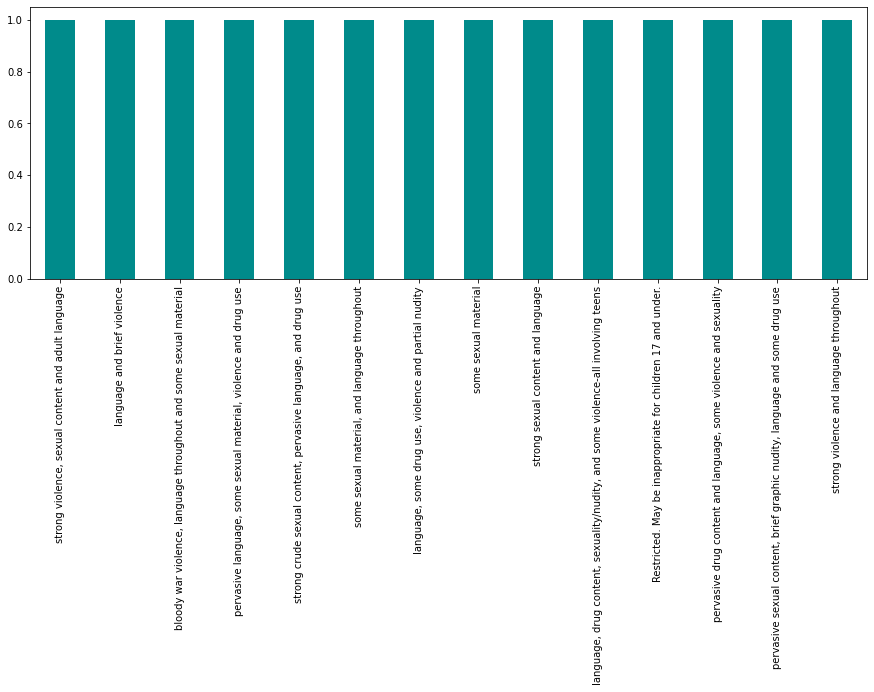

In [ ]:
R['ratingLevel'].value_counts(dropna=False).plot(kind='bar', figsize=(15,5), fontsize=10, color='#008b8b')

In [ ]:
PG_13 = data[data['rating'] == 'PG-13']
PG_13['ratingLevel'].value_counts(dropna=False)

crude and sexual humor, language and some drug content                              1
language and some crude sexual humor                                                1
adult content, adult language and mild violence                                     1
some sex-related material                                                           1
crude and suggestive humor, and for language                                        1
thematic elements, brief violence and innuendo                                      1
some violence and one sexual scene                                                  1
For some rude and suggestive material, and for language.                            1
thematic material involving threatening behavior, and for violence and sexuality    1
language and some sexual humor                                                      1
Parents strongly cautioned. May be inappropriate for children under 13.             1
some violent content and mature thematic elements     

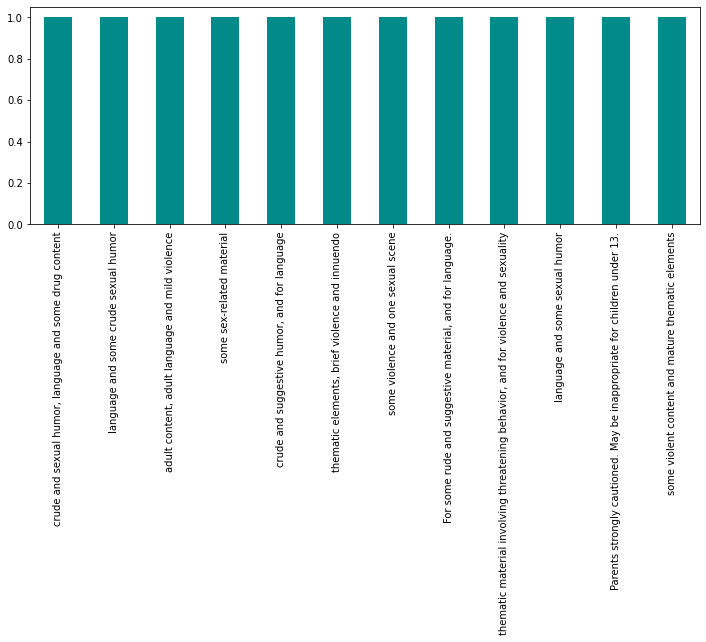

In [ ]:
PG_13['ratingLevel'].value_counts(dropna=False).plot(kind='bar', figsize=(12,4), fontsize=10, color='#008b8b')

In [ ]:
NR = data[data['rating'] == 'NR']
NR['ratingLevel'].value_counts(dropna=False)

This movie has not been rated.    7
NaN                               3
Name: ratingLevel, dtype: int64

In [ ]:
# Этот фильм не был оценен. Предназначен только для взрослых и может содержать темы секса, насилия, наркотиков, ненормативной лексики или другие темы для взрослых.
UR = data[data['rating'] == 'UR']
UR['ratingLevel'].value_counts(dropna=False)

This movie has not been rated. Intended for adults only and may contain sex, violence, drugs, language or other adult themes.    1
Name: ratingLevel, dtype: int64

###Анализ пропущенных значений в столбце 'user rating score'

In [ ]:
# Создание копий для анализа способов заполнения пропусков
data_no_filling = data.copy()
data_mean = data.copy()
data_median = data.copy()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.3% of the points cannot be placed; you

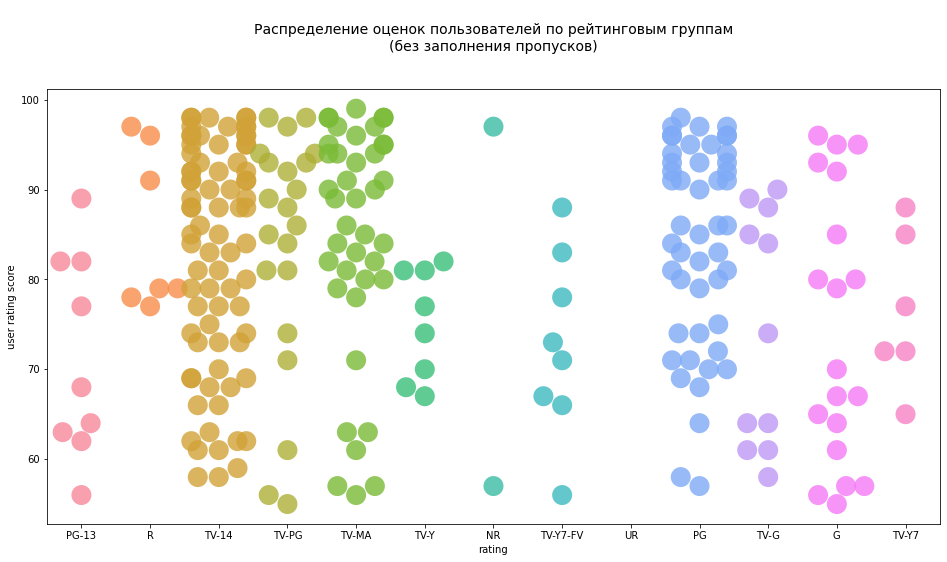

In [ ]:
# Распределение оценок пользователей по рейтинговым группам (без заполнения пропусков)
plt.figure(figsize=(16,8))
plt.title('\nРаспределение оценок пользователей по рейтинговым группам\n(без заполнения пропусков)\n\n', fontsize=14)

sns.swarmplot(x='rating',
              y='user rating score', 
              data=data_no_filling,
              alpha=0.8,
              s=20)
plt.show()

In [ ]:
# Заполнение пропусков  в столбце 'user rating score' внутрегрупповыми средними значениями
grp = data_mean.groupby(['rating'])
data_mean['user rating score'] = grp['user rating score'].apply(lambda x: x.fillna(x.mean()))

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.2% of the points cannot be placed; y

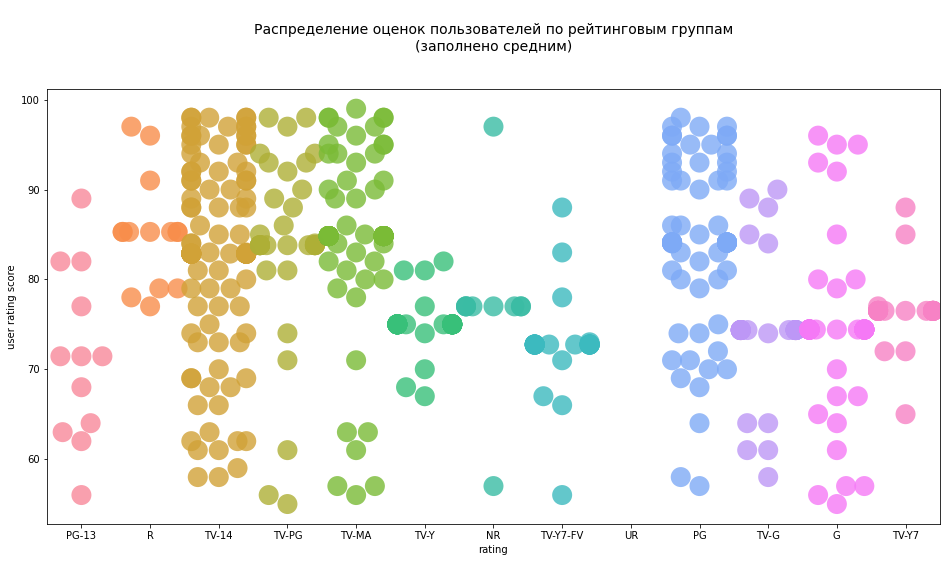

In [ ]:
# Распределение оценок пользователей по рейтинговым группам (заполнено средним)
plt.figure(figsize=(16,8))
plt.title('\nРаспределение оценок пользователей по рейтинговым группам\n(заполнено средним)\n\n', fontsize=14)

sns.swarmplot(x='rating',
              y='user rating score', 
              data=data_mean,
              alpha=0.8,
              s=20)
plt.show()

In [ ]:
# Заполнение пропусков  в столбце 'user rating score' внутрегрупповыми значениями медианы
grp = data_median.groupby(['rating'])
data_median['user rating score'] = grp['user rating score'].apply(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.9% of the points cannot be placed; yo

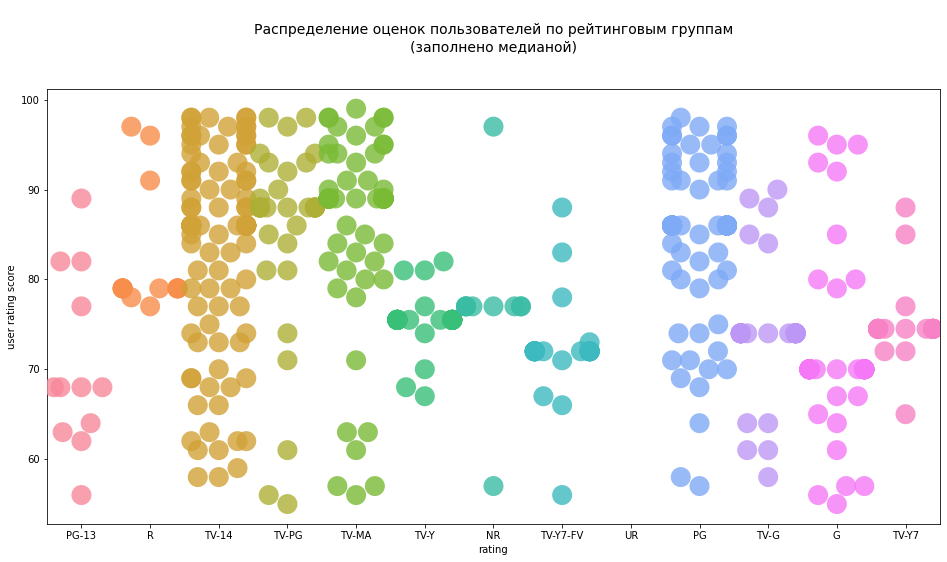

In [ ]:
# Распределение оценок пользователей по рейтинговым группам (заполнено медианой)
plt.figure(figsize=(16,8))
plt.title('\nРаспределение оценок пользователей по рейтинговым группам\n(заполнено медианой)\n\n', fontsize=14)

sns.swarmplot(x='rating',
              y='user rating score', 
              data=data_median,
              alpha=0.8,
              s=20)
plt.show()

In [ ]:
# Сравнение среднего и медианы при разных способах заполнения пропусков
print('No filling:')
print(f"mean = {data['user rating score'].mean()}")
print(f"median = {data['user rating score'].median()}\n")
print('Mean:')
print(f"mean = {data_mean['user rating score'].mean()}")
print(f"median = {data_mean['user rating score'].median()}\n")
print('Median:')
print(f"mean = {data_median['user rating score'].mean()}")
print(f"median = {data_median['user rating score'].median()}")

No filling:
mean = 81.3984375
median = 83.5

Mean:
mean = 80.35663185564566
median = 82.87012987012987

Median:
mean = 80.60821643286573
median = 82.0


In [ ]:
# Наиболее частые оценки пользователей без заполнения пропусков
data_no_filling['user rating score'].value_counts().head()

97.0    12
96.0    12
98.0    12
95.0    11
91.0    11
Name: user rating score, dtype: int64

In [ ]:
# Наиболее частые оценки пользователей с заполнением пропусков средним
data_mean['user rating score'].value_counts().head()

84.825000    42
74.421053    34
75.000000    30
82.870130    29
84.104167    28
Name: user rating score, dtype: int64

In [ ]:
# Наиболее частые оценки пользователей с заполнением пропусков медианой
data_median['user rating score'].value_counts().head()

86.0    63
89.0    49
70.0    39
75.5    28
74.0    25
Name: user rating score, dtype: int64

###Заполнение пропущенных значений

In [ ]:
# Заполнение пропусков в столбце 'ratingLevel' методом 'ffill'
data['ratingLevel'].fillna(method='ffill', inplace=True)

In [ ]:
data.isna().sum()

title                  0
rating                 0
ratingLevel            0
release year           0
user rating score    244
user rating size       0
dtype: int64

In [ ]:
# Заполнение пропусков  в столбце 'user rating score' внутрегрупповыми значениями медианы
grp = data.groupby(['rating'])
data['user rating score'] = grp['user rating score'].apply(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
# Видим, что в 'user rating score' осталось 1 пропущенное значение
data.isna().sum()

title                0
rating               0
ratingLevel          0
release year         0
user rating score    1
user rating size     0
dtype: int64

In [ ]:
# Это группа 'UR', которая состоит из одной записи, она не могла быть заполнена медианой
data[data['rating'] == 'UR']

,title,rating,ratingLevel,release year,user rating score,user rating size
38,White Girl,UR,This movie has not been rated. Intended for ad...,2016,NaN,82


In [ ]:
# Заполним оставшееся пропущенное значение медианой по 'user rating score'
data['user rating score'].fillna(data['user rating score'].median(), inplace = True)

In [ ]:
data.isna().sum()

title                0
rating               0
ratingLevel          0
release year         0
user rating score    0
user rating size     0
dtype: int64

###Удаление выбросов

In [ ]:
data.describe()

,release year,user rating score,user rating size
count,500.000000,500.000000,500.000000
mean,2010.976000,80.611000,80.972000
std,7.829305,10.460115,0.998604
min,1940.000000,55.000000,80.000000
25%,2009.000000,73.000000,80.000000
50%,2014.000000,82.000000,80.000000
75%,2016.000000,89.000000,82.000000
max,2017.000000,99.000000,82.000000


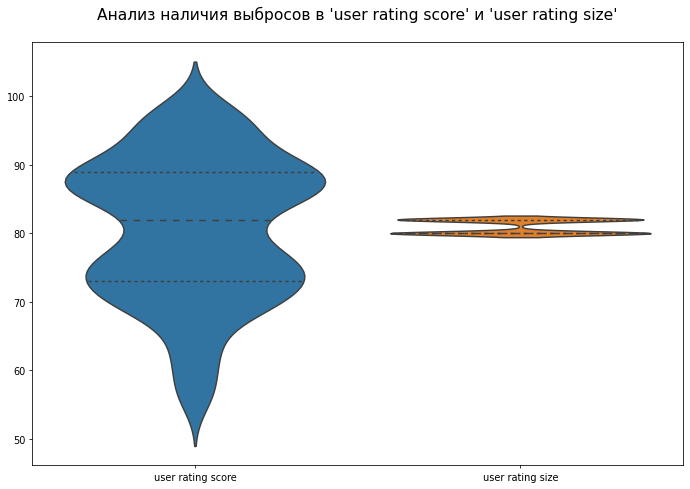

In [ ]:
# Анализ наличия выбросов в 'user rating score' и 'user rating size'
plt.figure(figsize=(12,8), dpi=70)
sns.violinplot(data=data[['user rating score', 'user rating size']], scale='width', inner='quartile')

plt.title("Анализ наличия выбросов в 'user rating score' и 'user rating size'\n", fontsize=16)

plt.show()

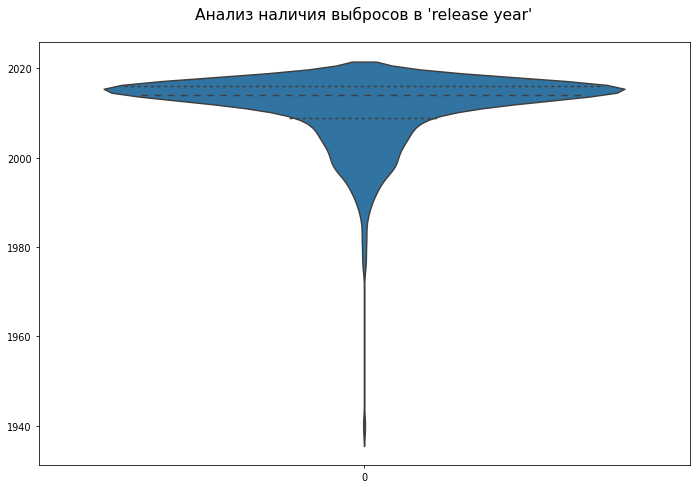

In [ ]:
# Анализ наличия выбросов в 'release year' (violinplot)
plt.figure(figsize=(12,8), dpi=70)
sns.violinplot(data=data['release year'], scale='width', inner='quartile')

plt.title("Анализ наличия выбросов в 'release year'\n", fontsize=16)

plt.show()

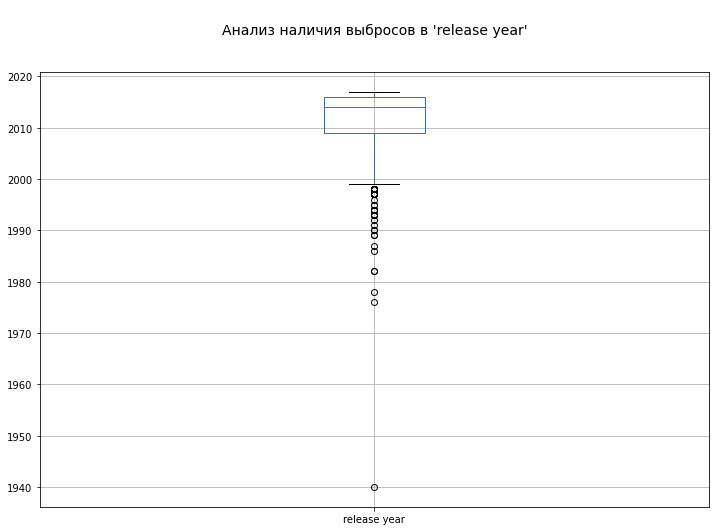

In [ ]:
# Анализ наличия выбросов в 'release year' (boxplot)
plt.figure(figsize=(12, 8))
plt.title("\nАнализ наличия выбросов в 'release year'\n\n",
          fontsize=14,
          loc='center',
          color='k')

data.boxplot(column=['release year'])

plt.show()

In [ ]:
# Это выброс
data[data['release year'] == 1940]

,title,rating,ratingLevel,release year,user rating score,user rating size
412,Fantasia,G,General Audiences. Suitable for all ages.,1940,61.0,80


In [ ]:
# Удаление выброса
data.drop(data.index[data['release year'] == 1940], inplace = True)

### Сколько рейтинговых групп представлено в данных?

In [ ]:
data['rating'].nunique()

13

In [ ]:
data['rating'].value_counts()

TV-14       106
TV-MA        82
PG           76
G            52
TV-Y         36
TV-PG        33
TV-G         29
TV-Y7-FV     25
TV-Y7        23
R            14
PG-13        12
NR           10
UR            1
Name: rating, dtype: int64

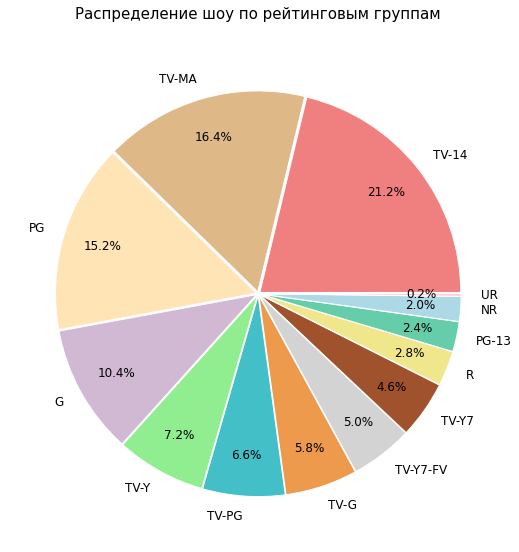

In [ ]:
# Распределение шоу по рейтинговым группам

vals = data['rating'].value_counts().tolist()
labels = data['rating'].value_counts().index.tolist()

fig = plt.figure(figsize =(9, 15))
colors = ['#f08080', '#deb887', '#ffe4b5', '#d2b9d3',
          '#90ee90', '#43bfc7', '#ee9a4d', '#d3d3d3',
          '#a0522d', '#f0e68c', '#66cdaa', '#add8e6', '#ffc0cb']
explode = (0.01, 0.01, 0.01, 0.01,
           0.01, 0.01, 0.01, 0.01,
           0.01, 0.01, 0.01, 0.01, 0.01)

plt.title('Распределение шоу по рейтинговым группам\n',
          fontsize=15,
          loc='center',
          color='k')

plt.pie(vals,
        labels=labels,
        startangle=0,
        colors=colors,
        explode=explode,
        autopct='%1.1f%%',
        pctdistance=0.8,
        wedgeprops={'edgecolor':'white'},
        textprops = {"fontsize":12})

plt.show()

### Какие оценки пользователи ставят чаще? 

- Постройте гистограмму оценок.
- Почему именно такие оценки ставят чаще всего?

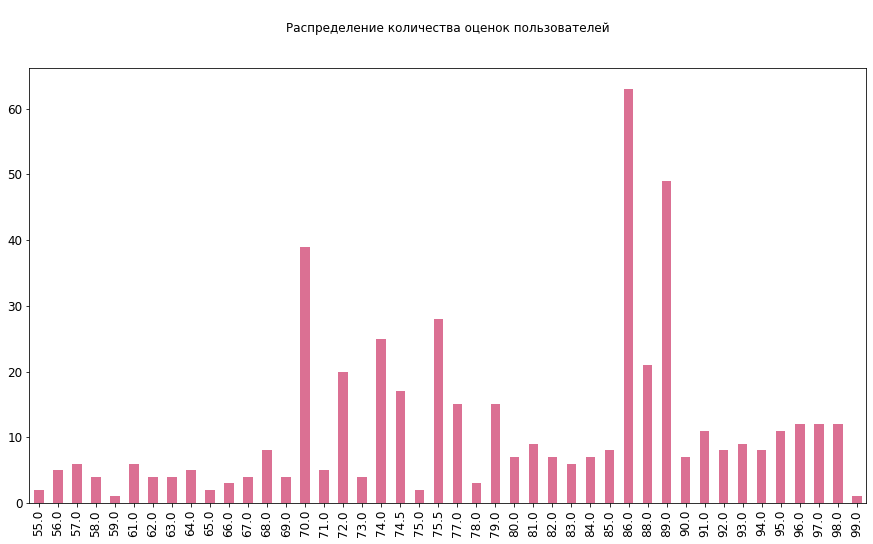

In [ ]:
# Распределение количества оценок пользователей
data['user rating score'].value_counts()\
                         .sort_index(ascending=True)\
                         .plot(kind='bar',
                               title='\nРаспределение количества оценок пользователей\n\n',
                               figsize=(15,8),
                               fontsize=12,
                               color='#db7093')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


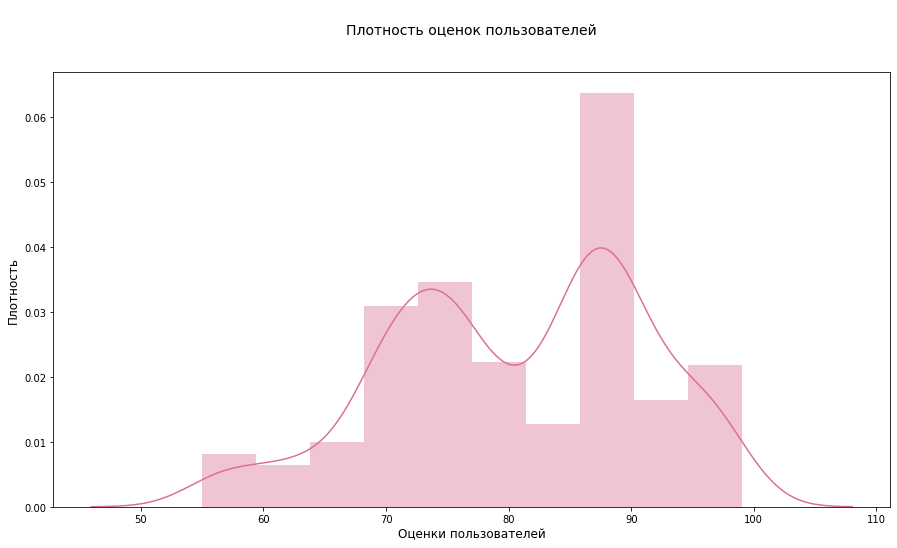

In [ ]:
# Плотность оценок пользователей
plt.figure(figsize=(15,8))
sns.distplot(data['user rating score'], bins=10, color='#db7093')

plt.title('\nПлотность оценок пользователей\n\n',
          fontsize=14,
          loc='center',
          color='k')

plt.xlabel('Оценки пользователей', fontsize=12)
plt.ylabel('Плотность', fontsize=12)

plt.show()

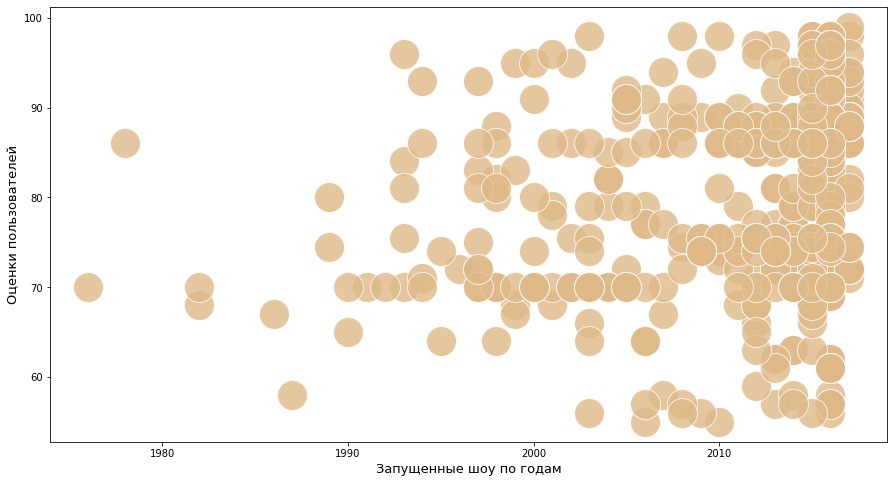

In [ ]:
# Оценки пользователей по годам запуска шоу
plt.figure(figsize=(15, 8))

X = pd.DataFrame(data, columns=['release year'])
y = pd.DataFrame(data, columns=['user rating score'])

plt.xlabel('Запущенные шоу по годам',fontsize=13)
plt.ylabel('Оценки пользователей',fontsize=13)
plt.scatter(X, y, s=900, alpha=0.8, ec='white', color='#deb887')

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.9% of the points cannot be placed; yo

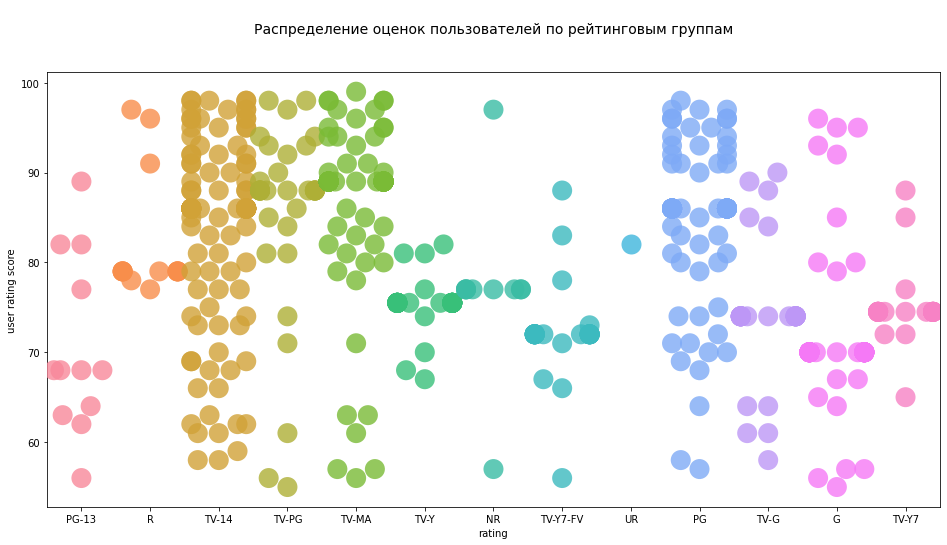

In [ ]:
# Распределение оценок пользователей по рейтинговым группам
plt.figure(figsize=(16,8))
plt.title('\nРаспределение оценок пользователей по рейтинговым группам\n\n', fontsize=14)

sns.swarmplot(x='rating',
              y='user rating score', 
              data=data,
              alpha=0.8,
              s=20)
plt.show()

###Дополнительный анализ оценок пользователей для данных без заполнения пропусков

In [ ]:
# Учитывая то, что в столбце 'user rating score' 48.79% данных были пропущены,
# дополнительно выполнил анализ без заполнения пропусков.
# Важно
# ==>
# До заполнения пропусков наиболее частовстречающимися оценками пользователей
# были значения превышающие 90.0

data_no_filling['user rating score'].value_counts().head()

97.0    12
96.0    12
98.0    12
95.0    11
91.0    11
Name: user rating score, dtype: int64

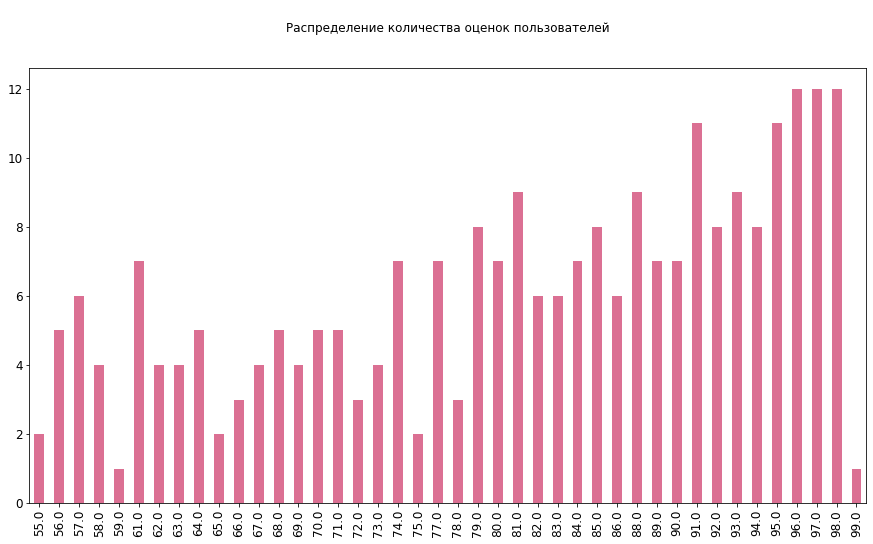

In [ ]:
# Распределение количества оценок пользователей
data_no_filling['user rating score'].value_counts()\
                         .sort_index(ascending=True)\
                         .plot(kind='bar',
                               title='\nРаспределение количества оценок пользователей\n\n',
                               figsize=(15,8),
                               fontsize=12,
                               color='#db7093')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


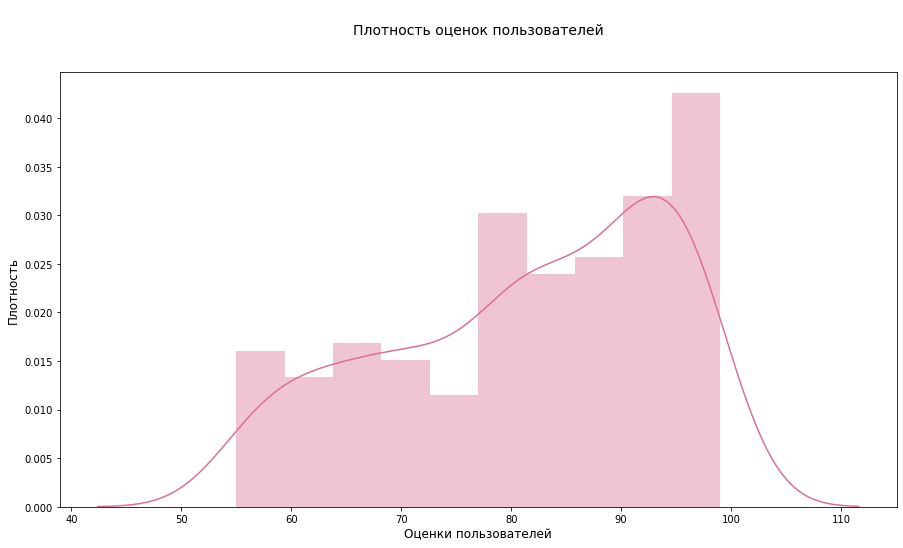

In [ ]:
# Плотность оценок пользователей
plt.figure(figsize=(15,8))
sns.distplot(data_no_filling['user rating score'], bins=10, color='#db7093')

plt.title('\nПлотность оценок пользователей\n\n',
          fontsize=14,
          loc='center',
          color='k')

plt.xlabel('Оценки пользователей', fontsize=12)
plt.ylabel('Плотность', fontsize=12)

plt.show()

In [ ]:
# Удаление выброса в копии данных для лучшей визуализации
data_no_filling.drop(data_no_filling.index[data_no_filling['release year'] == 1940], inplace = True)

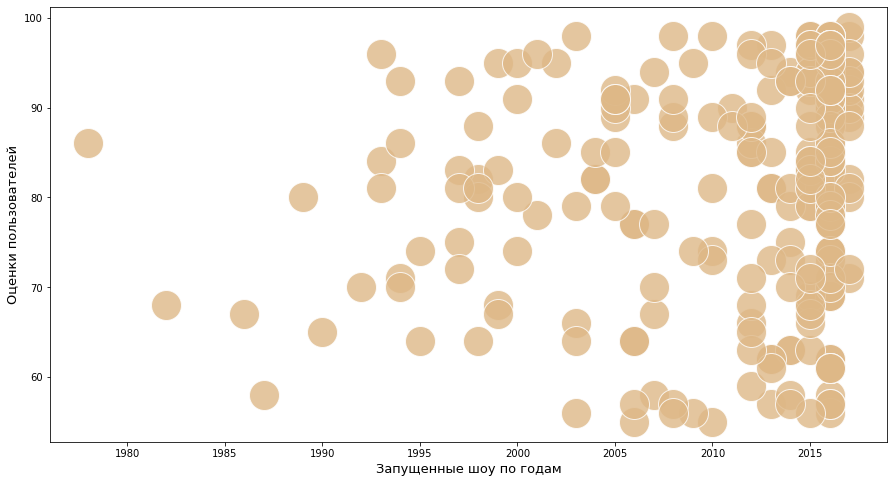

In [ ]:
# Оценки пользователей по годам запуска шоу
plt.figure(figsize=(15, 8))

X = pd.DataFrame(data_no_filling, columns=['release year'])
y = pd.DataFrame(data_no_filling, columns=['user rating score'])

plt.xlabel('Запущенные шоу по годам',fontsize=13)
plt.ylabel('Оценки пользователей',fontsize=13)
plt.scatter(X, y, s=900, alpha=0.8, ec='white', color='#deb887')

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.3% of the points cannot be placed; you

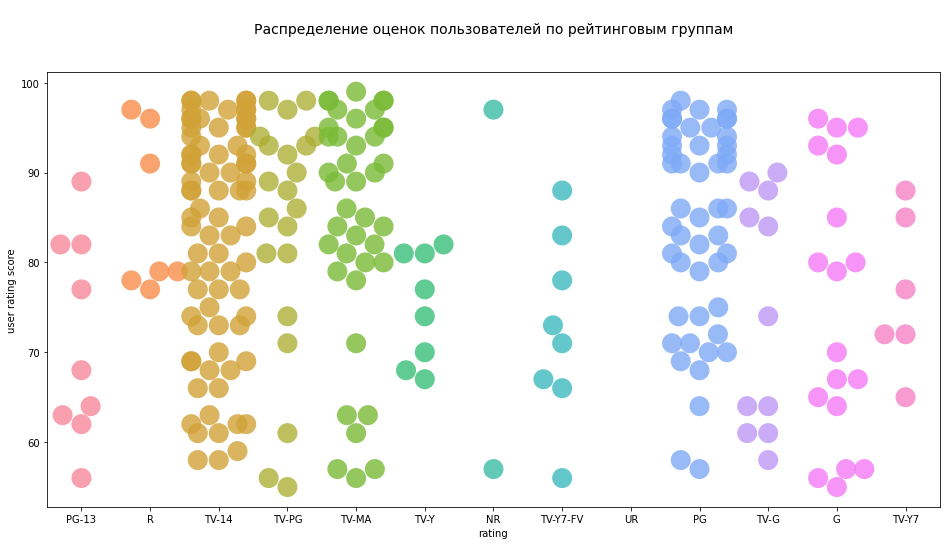

In [ ]:
# Распределение оценок пользователей по рейтинговым группам
plt.figure(figsize=(16,8))
plt.title('\nРаспределение оценок пользователей по рейтинговым группам\n\n', fontsize=14)

sns.swarmplot(x='rating',
              y='user rating score', 
              data=data_no_filling,
              alpha=0.8,
              s=20)
plt.show()

### Выведите основную информацию об оценках пользователей
- Чему равны среднее, стандартное отклонение, минимум, максимум, медиана? 
- Отличаются ли медиана и среднее? 
- Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
print(data['user rating score'].describe())

count    499.000000
mean      80.650301
std       10.433595
min       55.000000
25%       73.000000
50%       82.000000
75%       89.000000
max       99.000000
Name: user rating score, dtype: float64


In [ ]:
# Могут ли среднее и медиана значительно отличаться?
# ==>
# Да, могут. Среднее очень чувствительно к выбросам.
# Один выброс может в значительной степени изменить среднее, особенно если набор данных небольшой.
# Также сильно искаженные данные будут иметь существенно отличающиеся среднее и медиану. 
# Искаженные данные - это данные, в которых большинство оценок сгруппированы вблизи одного экстремума
# и относительно мало - возле другого. Поскольку средние значения более чувствительны к экстремальным значениям, чем медианы,
# среднее значение будет ближе к более населенному экстремуму, чем медиана.

# Вычисление значений среднего и медианы для нашего случая после заполнения пропусков.
print(f"mean = {data['user rating score'].mean()}")
print(f"median = {data['user rating score'].median()}")

mean = 80.6503006012024
median = 82.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


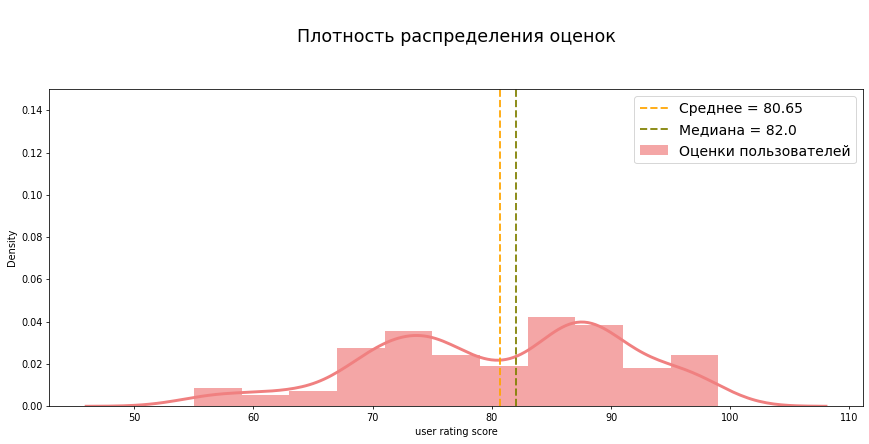

In [ ]:
# Плотность распределения оценок (среднее и медиана)

mean_pop = data['user rating score'].mean()
median_pop = data['user rating score'].median()

plt.figure(figsize=(15,6), dpi= 70)

g = sns.distplot(data['user rating score'],
             color='lightcoral',
             label='Оценки пользователей',
             hist_kws={'alpha':.7},
             kde_kws={'linewidth':3})

g.axvline(mean_pop,
          linewidth=2,
          color='orange',
          alpha=0.9,
          linestyle='--',
          label='Среднее = {:,.2f}'.format(mean_pop).replace(',', ' '))

g.axvline(median_pop,
          linewidth=2,
          color='olive',
          alpha=0.9,
          linestyle='--',
          label='Медиана = {:,.1f}'.format(median_pop).replace(',', ' '))

plt.ylim(0, 0.15)
plt.title('\nПлотность распределения оценок\n\n', fontsize=18)
plt.legend(fontsize='x-large')

plt.show()

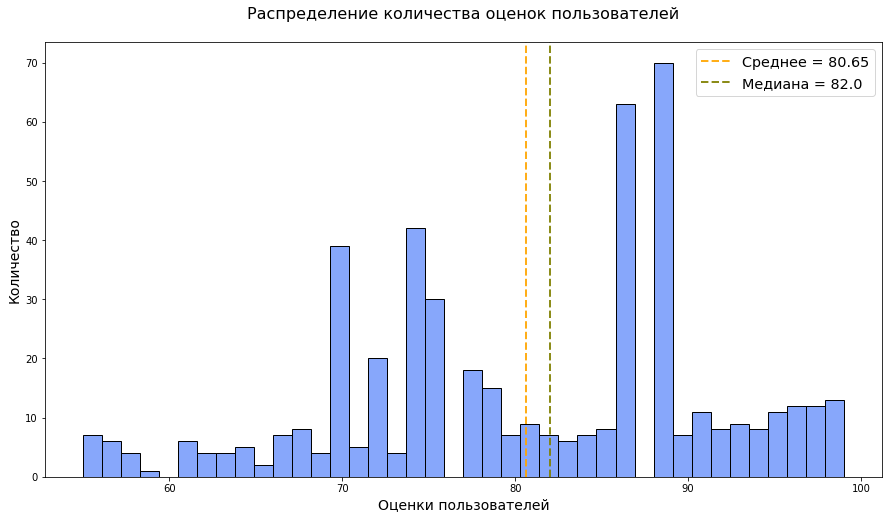

In [ ]:
# Распределение количества оценок пользователей (среднее и медиана)

mean_pop = data['user rating score'].mean()
median_pop = data['user rating score'].median()

sns.set_palette('rainbow')
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
g = sns.histplot(data=data['user rating score'],
                 alpha=0.6,
                 bins=40,
                 ax=ax)

g.axvline(mean_pop,
          linewidth=2,
          color='orange',
          alpha=0.9,
          linestyle='--',
          label='Среднее = {:,.2f}'.format(mean_pop).replace(',', ' '))

g.axvline(median_pop,
          linewidth=2,
          color='olive',
          alpha=0.9,
          linestyle='--',
          label='Медиана = {:,.1f}'.format(median_pop).replace(',', ' '))

plt.ticklabel_format(axis='x', style='plain')
plt.xlabel('Оценки пользователей', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Распределение количества оценок пользователей\n', fontsize=16)
plt.legend(fontsize='x-large')

plt.show()

### В какие годы были запущены шоу, представленные в датасете?

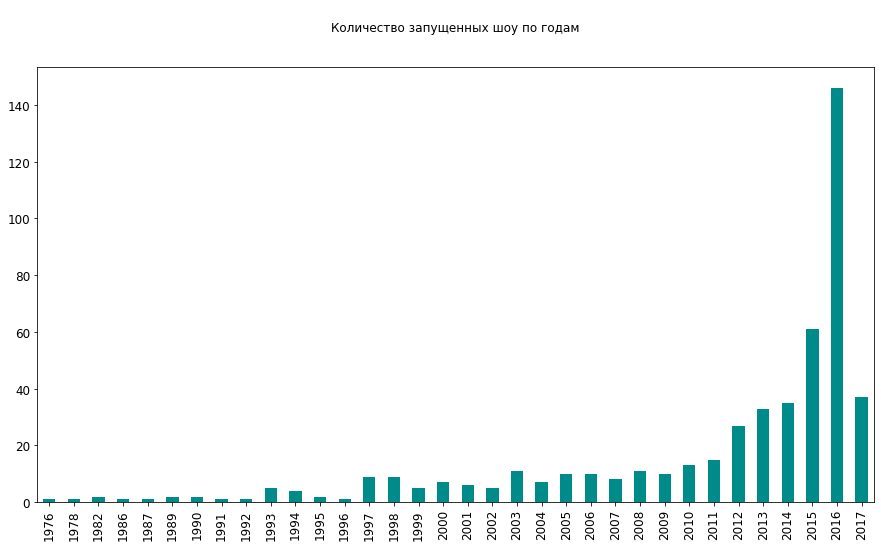

In [ ]:
# Количество запущенных шоу по годам
data['release year'].value_counts()\
                    .sort_index(ascending=True)\
                    .plot(kind='bar',
                          title='\nКоличество запущенных шоу по годам\n\n',
                          figsize=(15,8),
                          fontsize=12,
                          color='#008b8b')

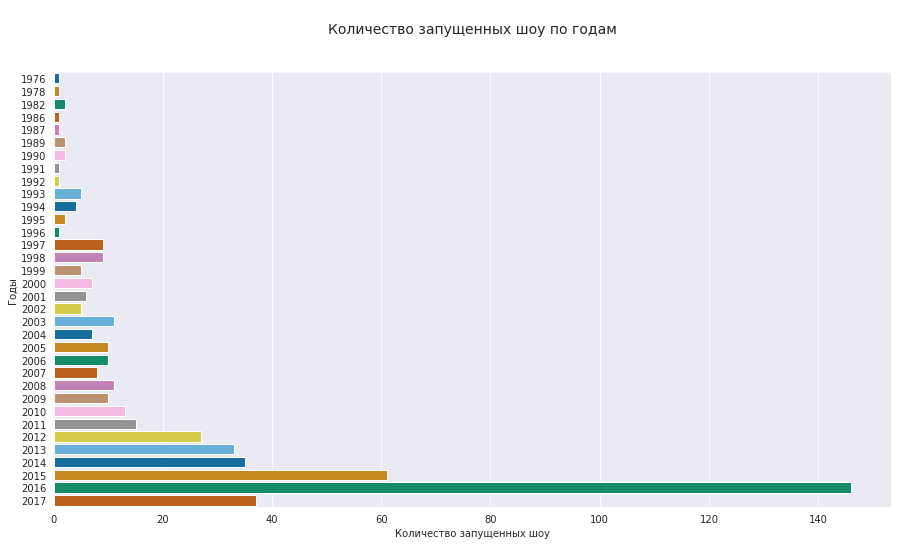

In [ ]:
# Количество запущенных шоу по годам
plt.figure(figsize=(15, 8))

sns.set_style('darkgrid')
sns.countplot(y='release year',data=data,palette='colorblind')

plt.title('\nКоличество запущенных шоу по годам\n\n', fontsize=14)

plt.xlabel('Количество запущенных шоу')
plt.ylabel('Годы')

plt.show()

### Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. 

- Наблюдается ли рост? 
- Есть ли выбросы?
- Что из себя представляют выбросы?
- Чем могут быть они вызваны?

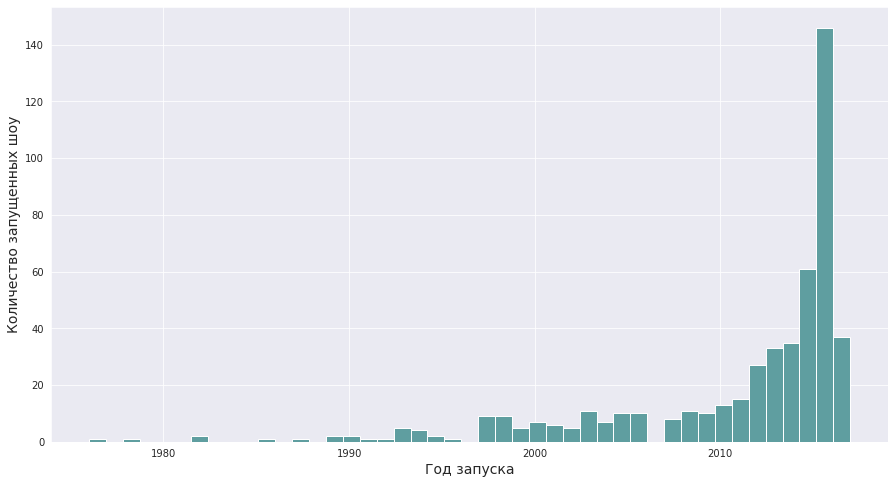

In [ ]:
# Важно
# ==>
# С 2009 по 2016 наблюдается устойчивый рост запущенных шоу, 
# после чего, в 2017, спад.

plt.figure(figsize=(15, 8))
plt.hist(data['release year'], ec='white', bins=45, color='#5F9EA0')

plt.xlabel('Год запуска', fontsize=14)
plt.ylabel('Количество запущенных шоу', fontsize=14)

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


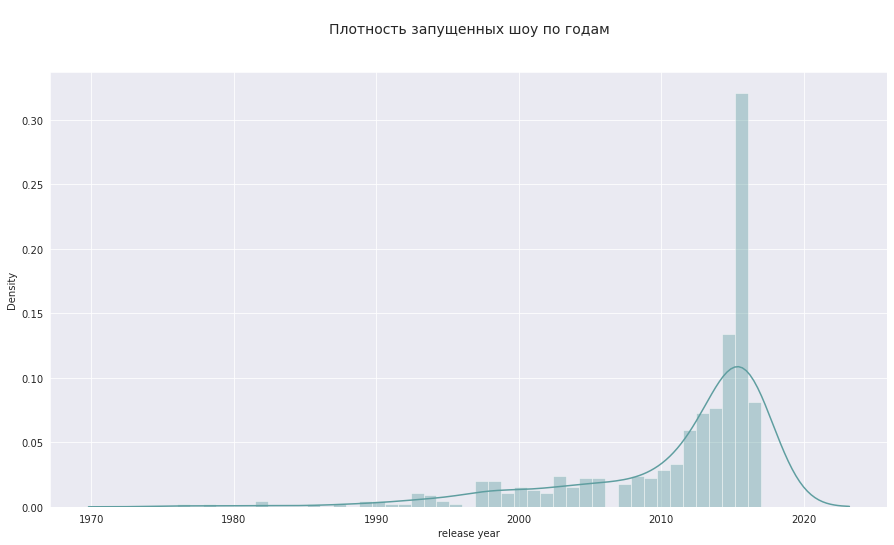

In [ ]:
# Плотность запущенных шоу по годам
plt.figure(figsize=(15,8))
sns.distplot(data['release year'], bins=45, color='#5F9EA0')

plt.title('\nПлотность запущенных шоу по годам\n\n', fontsize=14)

plt.show()

### Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. 
- Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки) 
- Как еще можно оценить "Успешность"? 



In [ ]:
# Количества и средние оценки за 2016 и 2017 года
print(f"Количество оценок за 2016 год: {data[data['release year'] == 2016]['user rating score'].count()}")
print(f"Средняя оценка за 2016 год: {round(data[data['release year'] == 2016]['user rating score'].mean(), 2)}\n")
print(f"Количество оценок за 2017 год: {data[data['release year'] == 2017]['user rating score'].count()}")
print(f"Средняя оценка за 2017 год: {round(data[data['release year'] == 2017]['user rating score'].mean(), 2)}")

Количество оценок за 2016 год: 146
Средняя оценка за 2016 год: 83.66

Количество оценок за 2017 год: 37
Средняя оценка за 2017 год: 86.16


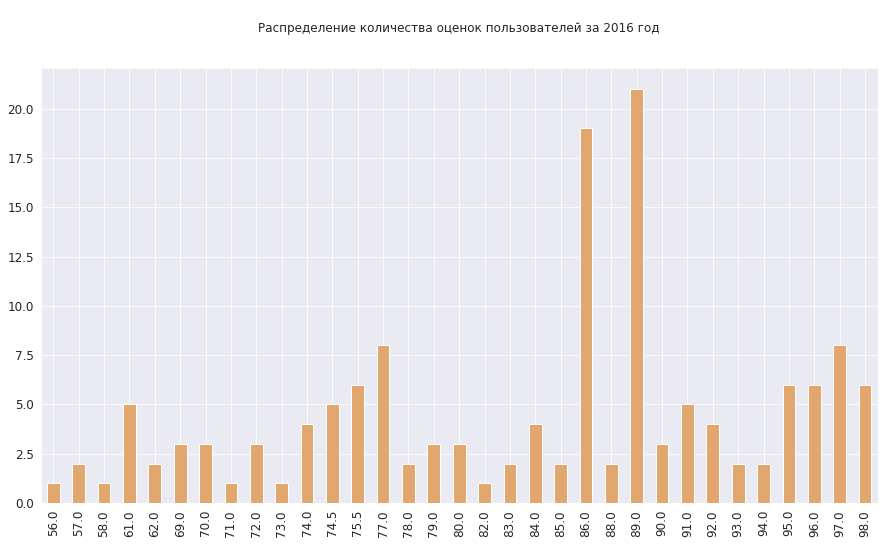

In [ ]:
# Распределение количества оценок пользователей за 2016 год
data[data['release year'] == 2016]['user rating score'].value_counts()\
                                                       .sort_index(ascending=True)\
                                                       .plot(kind='bar',
                                                             title='\nРаспределение количества оценок пользователей за 2016 год\n\n',
                                                             figsize=(15,8),
                                                             fontsize=12,
                                                             color='#E2A76F')

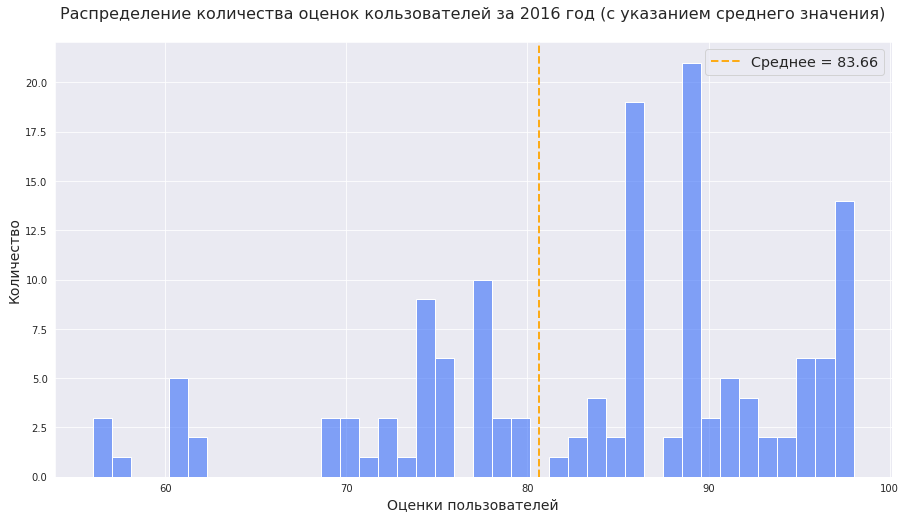

In [ ]:
# Распределение количества оценок кользователей за 2016 год (с указанием среднего значения)

mean_rating_pop = data[data['release year'] == 2016]['user rating score'].mean()

sns.set_palette('rainbow')
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
g = sns.histplot(data=data[data['release year'] == 2016]['user rating score'],
                 alpha=0.6,
                 bins=40,
                 ax=ax)

g.axvline(mean_pop,
          linewidth=2,
          color='orange',
          alpha=0.9,
          linestyle='--',
          label='Среднее = {:,.2f}'.format(mean_rating_pop).replace(',', ' '))

plt.ticklabel_format(axis='x', style='plain')
plt.xlabel('Оценки пользователей', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Распределение количества оценок кользователей за 2016 год (с указанием среднего значения)\n', fontsize=16)
plt.legend(fontsize='x-large')

plt.show()

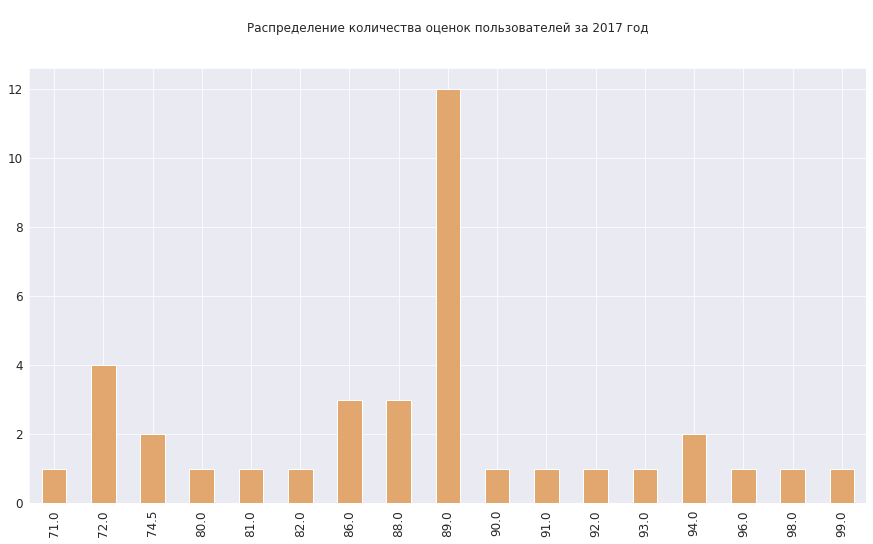

In [ ]:
# Распределение количества оценок пользователей за 2017 год
data[data['release year'] == 2017]['user rating score'].value_counts()\
                                                       .sort_index(ascending=True)\
                                                       .plot(kind='bar',
                                                             title='\nРаспределение количества оценок пользователей за 2017 год\n\n',
                                                             figsize=(15,8),
                                                             fontsize=12,
                                                             color='#E2A76F')

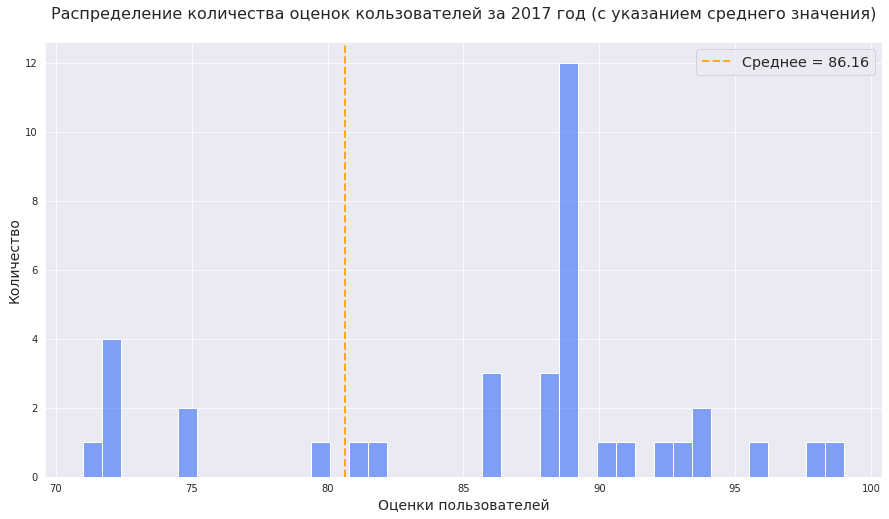

In [ ]:
# Распределение количества оценок кользователей за 2017 год (с указанием среднего значения)

mean_rating_pop = data[data['release year'] == 2017]['user rating score'].mean()

sns.set_palette('rainbow')
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
g = sns.histplot(data=data[data['release year'] == 2017]['user rating score'],
                 alpha=0.6,
                 bins=40,
                 ax=ax)

g.axvline(mean_pop,
          linewidth=2,
          color='orange',
          alpha=0.9,
          linestyle='--',
          label='Среднее = {:,.2f}'.format(mean_rating_pop).replace(',', ' '))

plt.ticklabel_format(axis='x', style='plain')
plt.xlabel('Оценки пользователей', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Распределение количества оценок кользователей за 2017 год (с указанием среднего значения)\n', fontsize=16)
plt.legend(fontsize='x-large')

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


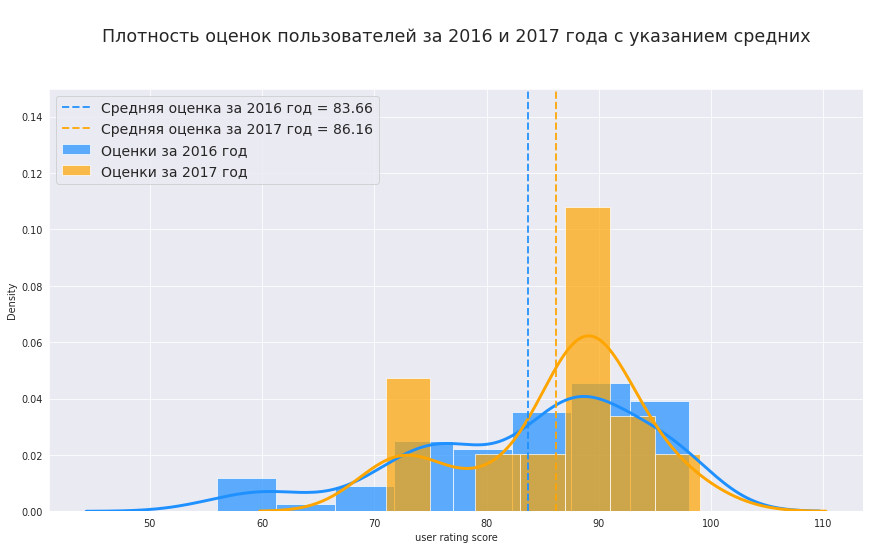

In [ ]:
# Плотность оценок пользователей за 2016 и 2017 года с указанием средних

mean_rating_pop_2016 = round(data[data['release year'] == 2016]['user rating score'].mean(), 2)
mean_rating_pop_2017 = round(data[data['release year'] == 2017]['user rating score'].mean(), 2)

plt.figure(figsize=(15,8), dpi= 70)

k = sns.distplot(data[data['release year'] == 2016]['user rating score'],
             color='dodgerblue',
             label='Оценки за 2016 год',
             hist_kws={'alpha':.7},
             kde_kws={'linewidth':3})

k = sns.distplot(data[data['release year'] == 2017]['user rating score'],
             color='orange',
             label='Оценки за 2017 год',
             hist_kws={'alpha':.7},
             kde_kws={'linewidth':3})

k.axvline(mean_rating_pop_2016,
          linewidth=2,
          color='dodgerblue',
          alpha=0.9,
          linestyle='--',
          label='Средняя оценка за 2016 год = {:,.2f}'.format(mean_rating_pop_2016).replace(',', ' '))

k.axvline(mean_rating_pop_2017,
          linewidth=2,
          color='orange',
          alpha=0.9,
          linestyle='--',
          label='Средняя оценка за 2017 год = {:,.2f}'.format(mean_rating_pop_2017).replace(',', ' '))

plt.ylim(0, 0.15)
plt.title('\nПлотность оценок пользователей за 2016 и 2017 года с указанием средних\n\n', fontsize=18)
plt.legend(fontsize='x-large')

plt.show()

В результате исследования имеющихся данных можно сделать следующие выводы:



*   При том, что количество запущенных шоу в 2017 году резко сократилось на 75% относительно 2016 года, со 146 шоу (запущенных в 2016) до 37 шоу (запущенных в 2017), средняя оценка пользователей в 2017 году составляет 86,16, что выше средней оценки за 2016 год, которая равна 83,66. Таким образом, если критерием успешности считать среднюю оценку пользователей, то 2017 год успешнее, чем 2016;
*   В 2017 году было запущено шоу "13 Reasons Why", у которого самая высокая оценка среди всех имеющихся данных - 99,0;
*   Если смотреть с точки зрения количества контента, то 2016 год можно считать безусловно более успешным, так как в 2016 году было запущено 146 шоу в 12 рейтинговых группах, что больше, чем в какой-либо другой год из рассмотренных нами. Для примера, в 2017 году было запущено 37 шоу в 5 рейтинговых группах.

### Как нагляднее будет показать распределение пользователям по рейтинговым группам?

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

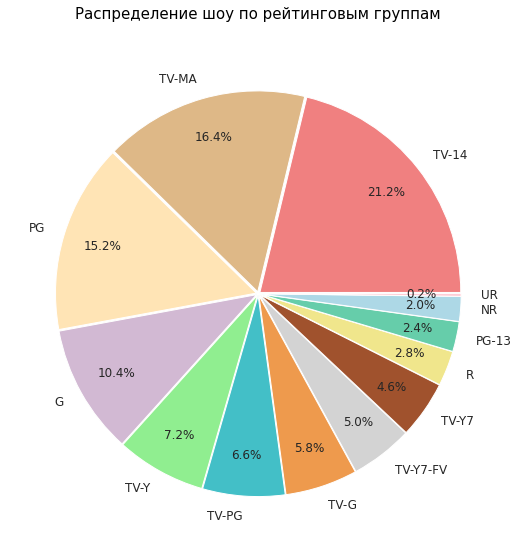

In [ ]:
# Круговая диаграмма является более интерпретируемым типом графика.
# Это очень хороший способ показать состав групп и их доли
# относительно общего количества наблюдений.

vals = data['rating'].value_counts().tolist()
labels = data['rating'].value_counts().index.tolist()

fig = plt.figure(figsize =(9, 15))
colors = ['#f08080', '#deb887', '#ffe4b5', '#d2b9d3',
          '#90ee90', '#43bfc7', '#ee9a4d', '#d3d3d3',
          '#a0522d', '#f0e68c', '#66cdaa', '#add8e6', '#ffc0cb']
explode = (0.01, 0.01, 0.01, 0.01,
           0.01, 0.01, 0.01, 0.01,
           0.01, 0.01, 0.01, 0.01, 0.01)

plt.title('Распределение шоу по рейтинговым группам\n',
          fontsize=15,
          loc='center',
          color='k')

plt.pie(vals,
        labels=labels,
        startangle=0,
        colors=colors,
        explode=explode,
        autopct='%1.1f%%',
        pctdistance=0.8,
        wedgeprops={'edgecolor':'white'},
        textprops = {'fontsize':12})

plt.show()

### Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) 
Аналитики и Data Scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

In [ ]:
# 13 Reasons Why (13 причин почему)
# TV-MA
# Для взрослой аудитории. Может не подходить для детей до 17 лет.
# Шоу с максимальной оценкой среди имеющихся данных.

data[data['title'] == '13 Reasons Why']

,title,rating,ratingLevel,release year,user rating score,user rating size
41,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0,80


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


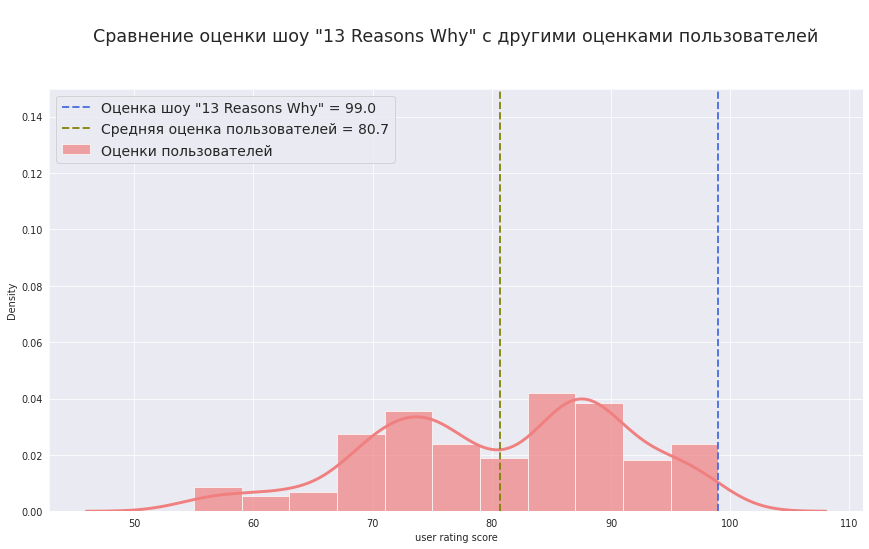

In [ ]:
# Сравнение оценки шоу "13 Reasons Why" с другими оценками пользователей

mean_user_rating_score = round(data['user rating score'].mean(), 1)
max_user_rating_score = round(data['user rating score'].max(), 1)

plt.figure(figsize=(15,8), dpi= 70)

f = sns.distplot(data['user rating score'],
             color='lightcoral',
             label='Оценки пользователей',
             hist_kws={'alpha':.7},
             kde_kws={'linewidth':3})

f.axvline(max_user_rating_score,
          linewidth=2,
          color='royalblue',
          alpha=0.9,
          linestyle='--',
          label='Оценка шоу "13 Reasons Why" = {:,.1f}'.format(max_user_rating_score).replace(',', ' '))

f.axvline(mean_user_rating_score,
          linewidth=2,
          color='olive',
          alpha=0.9,
          linestyle='--',
          label='Средняя оценка пользователей = {:,.1f}'.format(mean_user_rating_score).replace(',', ' '))

plt.ylim(0, 0.15)
plt.title('\nСравнение оценки шоу "13 Reasons Why" с другими оценками пользователей\n\n', fontsize=18)
plt.legend(fontsize='x-large')

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


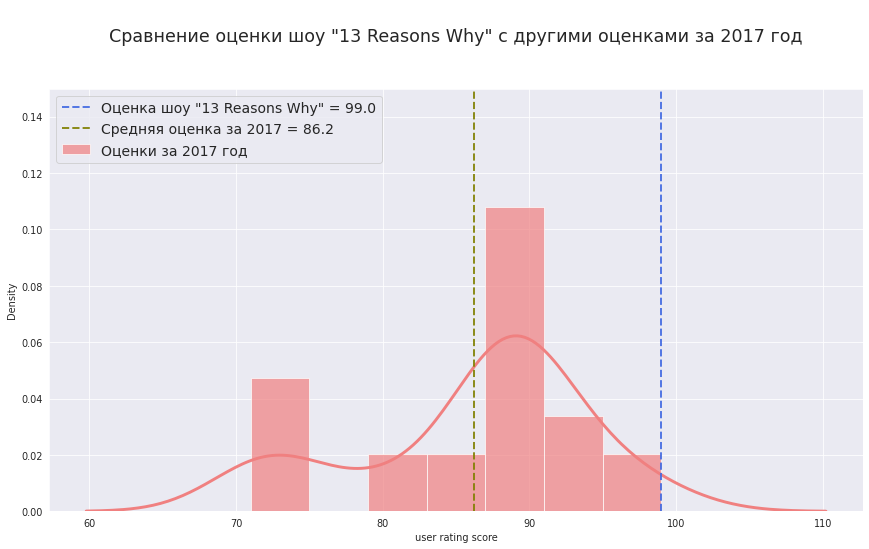

In [ ]:
# Сравнение оценки шоу "13 Reasons Why" с другими оценками за 2017 год

mean_rating_pop_2017 = round(data[data['release year'] == 2017]['user rating score'].mean(), 1)
max_user_rating_score = round(data['user rating score'].max(), 1)

plt.figure(figsize=(15,8), dpi= 70)

f = sns.distplot(data[data['release year'] == 2017]['user rating score'],
             color='lightcoral',
             label='Оценки за 2017 год',
             hist_kws={'alpha':.7},
             kde_kws={'linewidth':3})

f.axvline(max_user_rating_score,
          linewidth=2,
          color='royalblue',
          alpha=0.9,
          linestyle='--',
          label='Оценка шоу "13 Reasons Why" = {:,.1f}'.format(max_user_rating_score).replace(',', ' '))

f.axvline(mean_rating_pop_2017,
          linewidth=2,
          color='olive',
          alpha=0.9,
          linestyle='--',
          label='Средняя оценка за 2017 = {:,.1f}'.format(mean_rating_pop_2017).replace(',', ' '))

plt.ylim(0, 0.15)
plt.title('\nСравнение оценки шоу "13 Reasons Why" с другими оценками за 2017 год\n\n', fontsize=18)
plt.legend(fontsize='x-large')

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


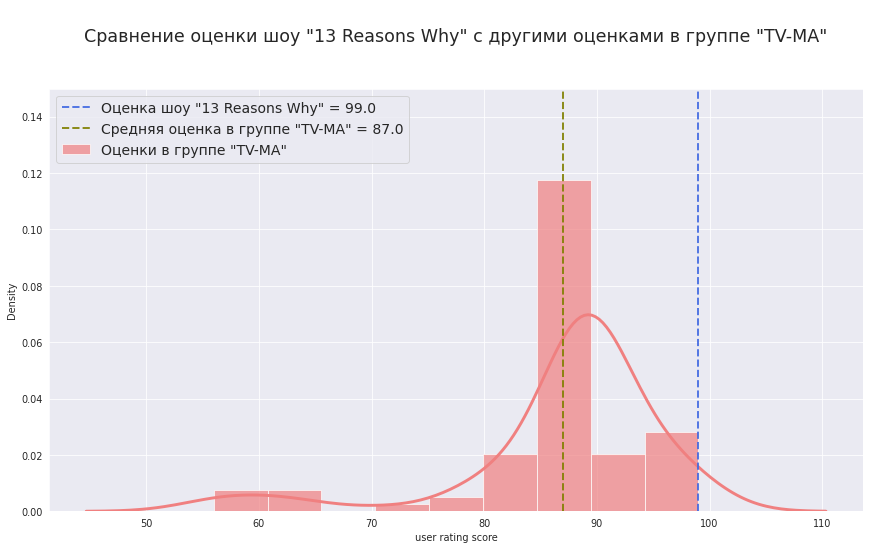

In [ ]:
# Сравнение оценки шоу "13 Reasons Why" с другими оценками в группе "TV-MA"

mean_rating_tv_ma = round(data[data['rating'] == 'TV-MA']['user rating score'].mean(), 1)
max_user_rating_score = round(data['user rating score'].max(), 1)

plt.figure(figsize=(15,8), dpi= 70)

f = sns.distplot(data[data['rating'] == 'TV-MA']['user rating score'],
             color='lightcoral',
             label='Оценки в группе "TV-MA"',
             hist_kws={'alpha':.7},
             kde_kws={'linewidth':3})

f.axvline(max_user_rating_score,
          linewidth=2,
          color='royalblue',
          alpha=0.9,
          linestyle='--',
          label='Оценка шоу "13 Reasons Why" = {:,.1f}'.format(max_user_rating_score).replace(',', ' '))

f.axvline(mean_rating_tv_ma,
          linewidth=2,
          color='olive',
          alpha=0.9,
          linestyle='--',
          label='Средняя оценка в группе "TV-MA" = {:,.1f}'.format(mean_rating_tv_ma).replace(',', ' '))

plt.ylim(0, 0.15)
plt.title('\nСравнение оценки шоу "13 Reasons Why" с другими оценками в группе "TV-MA"\n\n', fontsize=18)
plt.legend(fontsize='x-large')

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


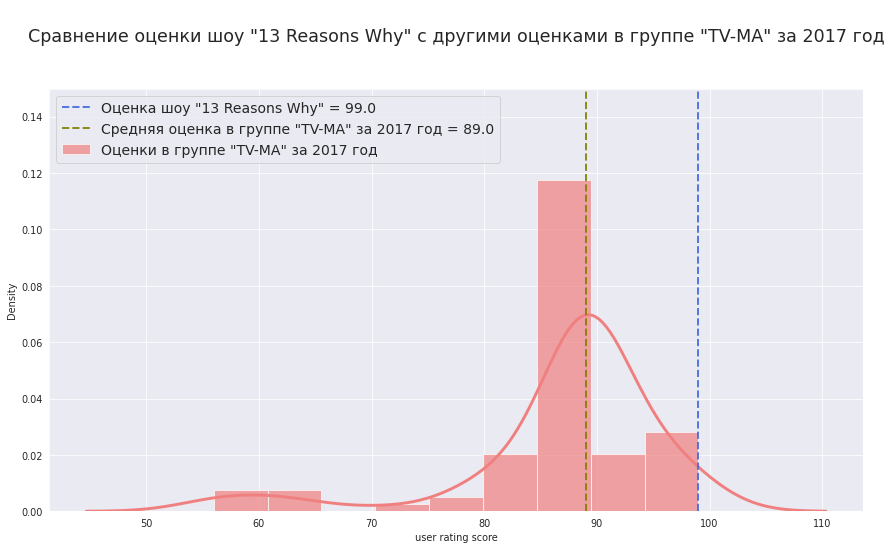

In [ ]:
# Сравнение оценки шоу "13 Reasons Why" с другими оценками в группе "TV-MA" за 2017 год

mean_rating_tv_ma_2017 = round(data[(data['rating'] == 'TV-MA') & (data['release year'] == 2017)]['user rating score'].mean(), 1)
max_user_rating_score = round(data['user rating score'].max(), 1)

plt.figure(figsize=(15,8), dpi= 70)

f = sns.distplot(data[data['rating'] == 'TV-MA']['user rating score'],
             color='lightcoral',
             label='Оценки в группе "TV-MA" за 2017 год',
             hist_kws={'alpha':.7},
             kde_kws={'linewidth':3})

f.axvline(max_user_rating_score,
          linewidth=2,
          color='royalblue',
          alpha=0.9,
          linestyle='--',
          label='Оценка шоу "13 Reasons Why" = {:,.1f}'.format(max_user_rating_score).replace(',', ' '))

f.axvline(mean_rating_tv_ma_2017,
          linewidth=2,
          color='olive',
          alpha=0.9,
          linestyle='--',
          label='Средняя оценка в группе "TV-MA" за 2017 год = {:,.1f}'.format(mean_rating_tv_ma_2017).replace(',', ' '))

plt.ylim(0, 0.15)
plt.title('\nСравнение оценки шоу "13 Reasons Why" с другими оценками в группе "TV-MA" за 2017 год\n\n', fontsize=18)
plt.legend(fontsize='x-large')

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

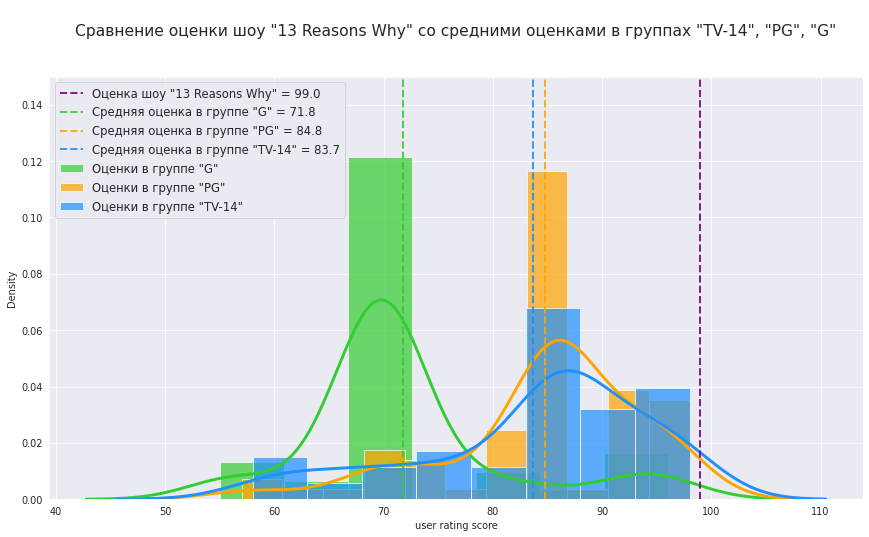

In [ ]:
# Сравнение оценки шоу "13 Reasons Why" со средними оценками в группах "TV-14", "PG", "G"

mean_rating_tv_14 = round(data[data['rating'] == 'TV-14']['user rating score'].mean(), 1)
mean_rating_pg = round(data[data['rating'] == 'PG']['user rating score'].mean(), 1)
mean_rating_g = round(data[data['rating'] == 'G']['user rating score'].mean(), 1)
max_user_rating_score = round(data['user rating score'].max(), 1)

plt.figure(figsize=(15,8), dpi= 70)

f = sns.distplot(data[data['rating'] == 'G']['user rating score'],
             color='limegreen',
             label='Оценки в группе "G"',
             hist_kws={'alpha':.7},
             kde_kws={'linewidth':3})

f = sns.distplot(data[data['rating'] == 'PG']['user rating score'],
             color='orange',
             label='Оценки в группе "PG"',
             hist_kws={'alpha':.7},
             kde_kws={'linewidth':3})

f = sns.distplot(data[data['rating'] == 'TV-14']['user rating score'],
             color='dodgerblue',
             label='Оценки в группе "TV-14"',
             hist_kws={'alpha':.7},
             kde_kws={'linewidth':3})

f.axvline(max_user_rating_score,
          linewidth=2,
          color='purple',
          alpha=0.9,
          linestyle='--',
          label='Оценка шоу "13 Reasons Why" = {:,.1f}'.format(max_user_rating_score).replace(',', ' '))

f.axvline(mean_rating_g,
          linewidth=2,
          color='limegreen',
          alpha=0.9,
          linestyle='--',
          label='Средняя оценка в группе "G" = {:,.1f}'.format(mean_rating_g).replace(',', ' '))

f.axvline(mean_rating_pg,
          linewidth=2,
          color='orange',
          alpha=0.9,
          linestyle='--',
          label='Средняя оценка в группе "PG" = {:,.1f}'.format(mean_rating_pg).replace(',', ' '))

f.axvline(mean_rating_tv_14,
          linewidth=2,
          color='dodgerblue',
          alpha=0.9,
          linestyle='--',
          label='Средняя оценка в группе "TV-14" = {:,.1f}'.format(mean_rating_tv_14).replace(',', ' '))

plt.ylim(0, 0.15)
plt.title('\nСравнение оценки шоу "13 Reasons Why" со средними оценками в группах "TV-14", "PG", "G"\n\n', fontsize=16)
plt.legend(fontsize='large')

plt.show()